In [1]:
# Import packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import os
import warnings
import glob
import baseline
import file_read

In [2]:
dict_1,n_cycle=file_read.read_file('../Rawdata/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt')
df = file_read.data_frame(dict_1,1)
df.head()

../Rawdata/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt Opened


,Potential,Current
0,-0.100027,0.000003
1,-0.100606,0.000003
2,-0.101023,0.000003
3,-0.101555,0.000003
4,-0.102163,0.000003


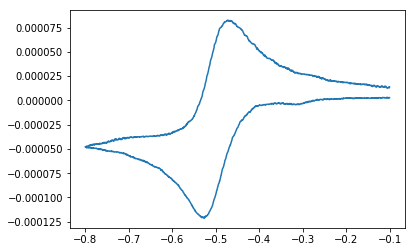

In [3]:
%matplotlib inline
plt.plot(df['Potential'],df['Current'])

In [6]:
x = pd.to_numeric(df['Potential'])
y = pd.to_numeric(df['Current'])
x1,x2=baseline.split(x)
y1,y2=baseline.split(y)

In [24]:
def critical_idx(x, y): ## Finds index where data set is no longer linear 
    """
    This function takes x and y values callculate the derrivative of x and y, and calculate moving average of 5 and 15 points.
    Finds intercepts of different moving average curves and return the indexs of the first intercepts.
    """
    k = np.diff(y)/(np.diff(x)) #calculated slops of x and y

    ## Calculate moving average for 5 and 15 points.
    ## This two arbitrary number can be tuned to get better fitting.
    ave5 = []
    ave15 = []
    for i in range(len(k)-30):  # The reason to minus 5 is to prevent j from running out of index.
        a = 0 
        for j in range(0,5):
            a = a + k[i+j]
        ave5.append(round(a/5, 5)) # keeping 9 desimal points for more accuracy
    
    for i in range(len(k)-30): 
        b = 0 
        for j in range(0,15):
            b = b + k[i+j]
        ave15.append(round(b/15, 5))
    ave5i = np.asarray(ave5)
    ave15i = np.asarray(ave15)
    ## Find intercepts of different moving average curves
    idx = np.argwhere(np.diff(np.sign(ave15i - ave5i[:len(ave15i)])!= 0)).reshape(-1)+0 #reshape into one row.
    #plt.plot(x[idx], ave5i[idx], 'ro') ## Plot intersections 
    #plt.plot(x[0:len(ave15)],ave15, x[0:len(ave5)], ave5) ## Plot moving averages
    return idx[0]

In [25]:
critical_idx(x1,y1)

60

In [26]:
def mean(vector):
    """
    This function returns the mean values.
    """
    a = 0
    for i in vector:
        a = a + i
    return a/len(vector)

def linear_coeff(x, y):
    """
    This function returns the inclination coeffecient and y axis interception coeffecient m and b. 
    """
    m = (y-mean(y)) / (x - mean(x))    
    b = mean(y) - m * mean(x)
    return m, b

def y_fitted_line(m, b, x):
    y_base = []
    for i in x:
        y = m * i + b
        y_base.append(y)
    return y_base

In [27]:
linear_coeff(x1,y1)

(array([1.14725082e-04, 1.15034656e-04, 1.14144729e-04, ...,
        3.14292902e-05, 3.12381538e-05, 3.07920301e-05]),
 array([ 1.43609258e-05,  1.45001666e-05,  1.40998929e-05, ...,
        -2.31040518e-05, -2.31900216e-05, -2.33906801e-05]))

In [69]:
def linear_background(x, y):
    idx = critical_idx(x, y) + 5 #this is also arbitrary number we can play with.
    m, b = linear_coeff(x[(idx - int(0.5 * idx)) : (idx + int(0.5 * idx))], y[(idx - int(0.5 * idx)) : (idx + int(0.5 * idx))])
    y_base = y_fitted_line((m[int(len(m)/2)]), mean(b), x)
    return y_base 

In [70]:
idx = critical_idx(x1, y1)
m, b = linear_coeff(x[(idx - int(0.5 * idx)) : (idx + int(0.5 * idx))], y[(idx - int(0.5 * idx)) : (idx + int(0.5 * idx))])

In [71]:
linear_background(x1,y1)

[5.118013442104323e-05,
 5.145887362827408e-05,
 5.1659623627264176e-05,
 5.19157363358079e-05,
 5.2208436574143575e-05,
 5.239329988256611e-05,
 5.2649894005975515e-05,
 5.29098580334447e-05,
 5.312023632974847e-05,
 5.338357026127745e-05,
 5.3609353833283095e-05,
 5.385246834045336e-05,
 5.410617397466866e-05,
 5.431462661150969e-05,
 5.457266497951615e-05,
 5.481529807182072e-05,
 5.504685862221458e-05,
 5.530971113887787e-05,
 5.551479387165912e-05,
 5.576561101668032e-05,
 5.606745813746399e-05,
 5.622295513907982e-05,
 5.649158463413132e-05,
 5.676117695891418e-05,
 5.697155525521795e-05,
 5.7233926357015557e-05,
 5.743226928167723e-05,
 5.7713896978102194e-05,
 5.797578666503411e-05,
 5.814380045315772e-05,
 5.840906004414943e-05,
 5.865217455131969e-05,
 5.889577047335564e-05,
 5.9156697330556194e-05,
 5.93690012863227e-05,
 5.9614041452955694e-05,
 5.989663197911202e-05,
 6.0097863392967795e-05,
 6.033231243255575e-05,
 6.059660919381609e-05,
 6.08146901279708e-05,
 6.10698400

In [72]:
#find linear backgroud
y_pred1 = linear_background(x1,y1)
y_pred2 = linear_background(x2,y2)


In [73]:
#cathodic peak current and potential
max_pos = y2.argmax()
max_pot = x2[max_pos]
max_cur = y2[max_pos] - y_pred2[max_pos]
#Anodic peak current and potential
min_pos = y1.argmin()
min_pot = x1[min_pos]
min_cur = y1[min_pos] - y_pred1[min_pos]
f"For this CV data, the 'Ipc' is {max_cur}, Vpc is {max_pot}, Ipa is {min_cur}, Vpa is {min_pot}"

"For this CV data, the 'Ipc' is 0.00018474434634362677, Vpc is -0.472622, Ipa is -0.0003775390596472534, Vpa is -0.526474"

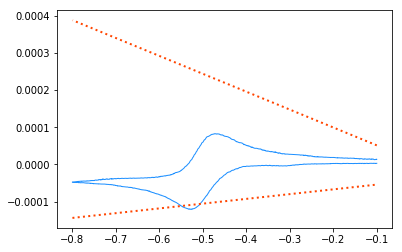

In [74]:
## Plot all data 
plt.plot(x1, y1, 'dodgerblue',linewidth=1) ##darkgrey
plt.plot(x2, y2, 'dodgerblue', linewidth=1) ##dodgerblue  
plt.plot(x1, y_pred1, color = "orangered", linestyle=':',linewidth=2) 
plt.plot(x2, y_pred2, color = "orangered", linestyle=':',linewidth=2) 

test.txt Opened
1
2
executed


/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


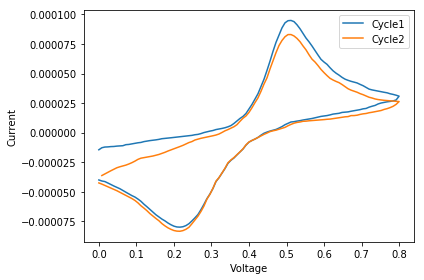

In [13]:
import file_read

In [46]:
dict_1, n_cycle = file_read.read_file('test.txt')

test.txt Opened


In [47]:
df = file_read.data_frame(dict_1, 2)

In [48]:
df.shape

(200, 2)

In [49]:
#c using a b for x and y
a = pd.to_numeric(df['Potential'])
b = pd.to_numeric(df['Current'])

In [51]:
a1,a2=baseline.split(a)
b1,b2=baseline.split(b)
len(b1)

100

In [53]:
baseline.critical_idx(a1,b1)

3

In [55]:
#find linear backgroud
b_pred1 = linear_background(a1,b1)
b_pred2 = linear_background(a2,b2)

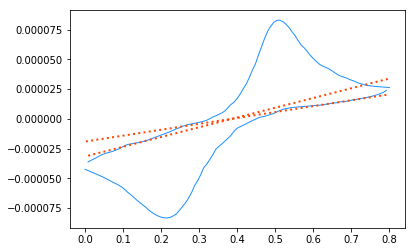

In [56]:
#Plot all data 
plt.plot(a1, b1, 'dodgerblue',linewidth=1) ##darkgrey
plt.plot(a2, b2, 'dodgerblue', linewidth=1) ##dodgerblue  
plt.plot(a1, b_pred1, color = "orangered", linestyle=':',linewidth=2) 
plt.plot(a2, b_pred2, color = "orangered", linestyle=':',linewidth=2) 

In [58]:
idx = np.argwhere(np.diff(np.sign(np.array(ma20) - np.array(ma10)[:len(ma20)]))!= 0).reshape(-1)
idx

array([   3,   13,   23,   31,   35,   36,   40,   45,   46,   50,   56,
         57,   58,   59,   60,   61,   62,   65,   75,   82,   83,   84,
         92,   93,   94,  101,  103,  104,  111,  113,  114,  116,  117,
        118,  119,  120,  123,  124,  126,  127,  128,  129,  130,  136,
        137,  138,  145,  146,  149,  154,  155,  170,  173,  175,  176,
        178,  180,  183,  188,  189,  198,  199,  201,  202,  205,  206,
        209,  211,  212,  215,  224,  225,  226,  231,  233,  234,  241,
        242,  244,  247,  250,  252,  257,  258,  262,  267,  271,  272,
        277,  281,  282,  283,  293,  301,  310,  311,  312,  315,  316,
        317,  332,  334,  352,  354,  364,  365,  400,  402,  403,  407,
        415,  424,  430,  431,  432,  442,  448,  450,  451,  458,  467,
        477,  484,  494,  503,  512,  522,  523,  524,  526,  540,  541,
        542,  543,  544,  545,  555,  559,  561,  562,  573,  575,  578,
        581,  591,  592,  593,  594,  595,  596,  8

In [49]:
max_pos = b1.argmax()
max_pot = a1[max_pos]
max_pot

0.511881

In [66]:
dy[64]

-0.0001255141468278697

In [2]:
# Check for all the modules that required if not exist then exit with notification.
import sys
import imp
try:
    imp.find_module('numpy')
    foundnp = True
except ImportError:
    foundnp = False
try:
    imp.find_module('matplotlib')
    foundplot = True
except ImportError:
    foundplot = False
try:
    imp.find_module('pandas')
    foundpd = True
except ImportError:
    foundplot = False
if not foundnp:
    print("Numpy is required. Exiting")
    sys.exit()
if not foundplot:
    print("Matplotlib is required. Exiting")
    sys.exit()
if not foundpd:
    print("Pandas is required. Exiting")
    sys.exit()

In [3]:
# This part use classification. All the following code blocks with correct indentation should be able to use the same style. 
# part of _init_
class cv:
    _colors = {'red': 'r', 'green': 'g', 'blue': 'b', 'yellow': 'y', 'cyan': 'c', 'magenta': 'm', 'black': 'k', 'white': 'w'}
    _linestyles = {' ': ' ', '-': 'solid', '--': 'dashed', '-.': 'dash_dot', ':': 'dotted'}
    _markers  = {' ': ' ', '.': '.', '_' : '_', 'o': 'o', '*': '*', '+': '+', 'x': 'x', 'square': 's', 'triangle': '^', 'diamond': 'd'}


In [4]:
# Find relevant files in folder
path = os.getcwd()
extension = ['csv','txt','dat'] # Should include all the possible ones
os.chdir(path)
result = [i for i in glob.glob('*.{}'.format(extension))]
print("Plotting the following:")
print(result)
#Make x-axis
t = np.linspace(325, 1100, 776)

Plotting the following:
[]
